In [1]:
import datetime
import warnings

from fixed_income import data, yieldcurves, plots

warnings.filterwarnings('ignore')
%matplotlib notebook

# Get Treasury data

In [2]:
quote_date = datetime.date(year=2017, month=12, day=12)

df = data.treasury_direct(quote_date)

In [3]:
df[200:205]

,CUSIP,SECURITY TYPE,RATE,MATURITY DATE,CALL DATE,BUY,SELL,END OF DAY,MATURITY
201,912828U65,MARKET BASED NOTE,1.750%,2021-11-30,NaN,98.656250,98.65625,98.68750,3.967227
202,912828U81,MARKET BASED NOTE,2.000%,2021-12-31,NaN,99.562500,99.56250,99.59375,4.052102
203,912828G87,MARKET BASED NOTE,2.125%,2021-12-31,NaN,100.109375,100.09375,100.12500,4.052102
204,912828H86,MARKET BASED NOTE,1.500%,2022-01-31,NaN,97.593750,97.59375,97.62500,4.136977
205,912828V72,MARKET BASED NOTE,1.875%,2022-01-31,NaN,99.015625,99.00000,99.06250,4.136977


# Fit Nelson-Siegel

In [4]:
treasuries = df[df['SECURITY TYPE'].isin(['MARKET BASED BILL', 'MARKET BASED NOTE', 'MARKET BASED BOND'])]

In [5]:
treasuries.head()

,CUSIP,SECURITY TYPE,RATE,MATURITY DATE,CALL DATE,BUY,SELL,END OF DAY,MATURITY
1,912796MG1,MARKET BASED BILL,0.000%,2017-12-14,NaN,0.000000,99.995000,99.997444,0.005476
2,912796MH9,MARKET BASED BILL,0.000%,2017-12-21,NaN,99.972625,99.972500,99.975333,0.024641
3,912796MJ5,MARKET BASED BILL,0.000%,2017-12-28,NaN,99.946000,99.945778,99.949167,0.043807
4,912796RK7,MARKET BASED BILL,0.000%,2018-01-02,NaN,99.932042,99.931750,99.935556,0.057496
5,912796LC1,MARKET BASED BILL,0.000%,2018-01-04,NaN,99.925569,99.925250,99.927889,0.062972


In [6]:
prices = treasuries['END OF DAY']

In [7]:
cashflows, maturities = data.cashflows_matrix(treasuries, quote_date)

In [8]:
nelson_siegel = yieldcurves.NelsonSiegel.from_fit(prices, cashflows, maturities)

In [9]:
nelson_siegel

NelsonSiegel(theta0=0.0316,theta1=-0.0118,theta2=0.0010,kappa=8.2685)

<IPython.core.display.Javascript object>


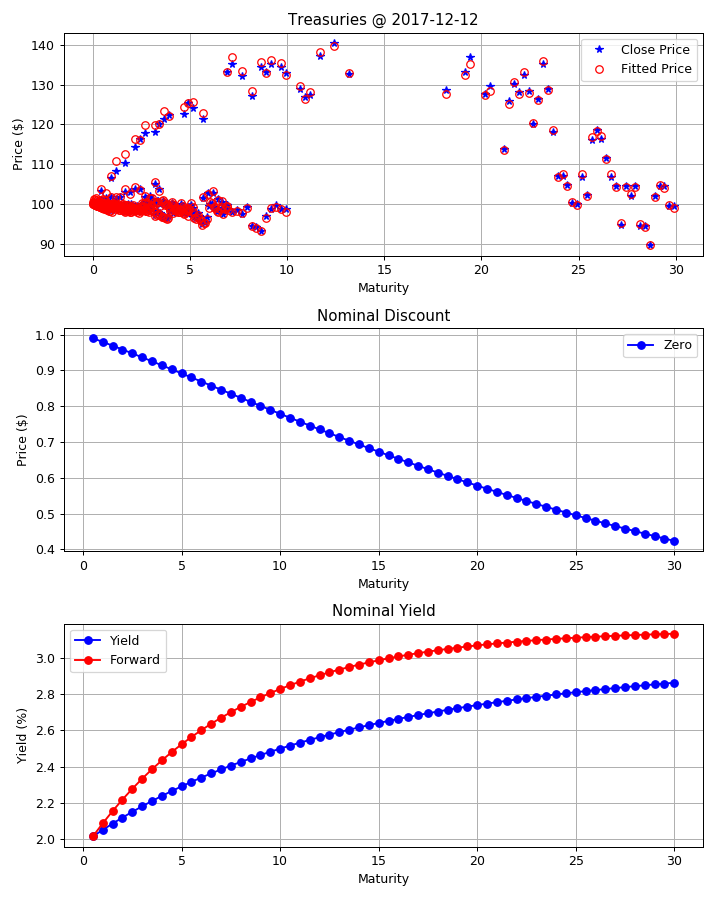

In [10]:
fig = plots.term_structure(nelson_siegel, prices, treasuries['MATURITY'], cashflows, maturities, quote_date)